In [1]:
# merge DAM and DCL price data
import pandas as pd
import numpy as np

# Read DAM EFA block averages
dam_data = pd.read_csv('EFA_Block_DAM_Averages.csv')
dam_data['Delivery_Date'] = pd.to_datetime(dam_data['Delivery_Date'])
dam_data['Delivery_Date'] = dam_data['Delivery_Date'].dt.strftime('%d/%m/%Y')

# Read DCL weighted averages
DCL_data = pd.read_csv('DCL_Weighted_Average_Prices.csv')

# Merge the datasets
merged_data = pd.merge(
    dam_data, 
    DCL_data, 
    left_on=['Delivery_Date', 'EFA_Block'], 
    right_on=['Delivery date', 'EFA block of the day'], 
    how='inner'
)

# Select and rename columns
final_data = merged_data[['Delivery_Date', 'EFA_Block', 'Average_DAM_Price', 'Weighted_Avg_Clearing_Price']].copy()
final_data.columns = ['Delivery day', 'EFA block of the day', 'Average DAM price in EFA block', 'DCL_Clearing_Price']

# Check for missing values and fill with overall averages
print("Missing values check:")
print(final_data.isnull().sum())

if final_data['DCL_Clearing_Price'].isnull().any():
    dam_mean = final_data['Average DAM price in EFA block'].mean()
    final_data['Average DAM price in EFA block'].fillna(dam_mean, inplace=True)
    print(f"Filled missing DAM prices with average: £{dam_mean:.2f}")

if final_data['DCL_Clearing_Price'].isnull().any():
    DCL_mean = final_data['DCL_Clearing_Price'].mean()
    final_data['DCL_Clearing_Price'].fillna(DCL_mean, inplace=True)
    print(f"Filled missing DCL prices with average: £{DCL_mean:.2f}")

print("After filling:")
print(final_data.isnull().sum())

#Convert Delivery Date to datetime format
final_data['Delivery day'] = pd.to_datetime(final_data['Delivery day'], format='%d/%m/%Y')

# Save merged and cleaned dataset with datetime parsing
final_data.to_csv('DAM_DCL_Merged_Prices.csv', index=False)

# Verify the datetime format is preserved when reading back
test_read = pd.read_csv('DAM_DCL_Merged_Prices.csv', parse_dates=['Delivery day'])
print(f"Date column dtype after reading: {test_read['Delivery day'].dtype}")
print(f"Sample dates: {test_read['Delivery day'].head(3).tolist()}")

print(f"Merged and cleaned dataset created with {len(final_data)} records")
print(final_data.head(10))

Missing values check:
Delivery day                      0
EFA block of the day              0
Average DAM price in EFA block    0
DCL_Clearing_Price                0
dtype: int64
After filling:
Delivery day                      0
EFA block of the day              0
Average DAM price in EFA block    0
DCL_Clearing_Price                0
dtype: int64
Date column dtype after reading: datetime64[ns]
Sample dates: [Timestamp('2023-11-03 00:00:00'), Timestamp('2023-11-03 00:00:00'), Timestamp('2023-11-03 00:00:00')]
Merged and cleaned dataset created with 3635 records
  Delivery day  EFA block of the day  Average DAM price in EFA block  \
0   2023-11-03                     1                         23.3125   
1   2023-11-03                     2                         40.6750   
2   2023-11-03                     3                         84.4500   
3   2023-11-03                     4                         73.5250   
4   2023-11-03                     5                         93.0000   

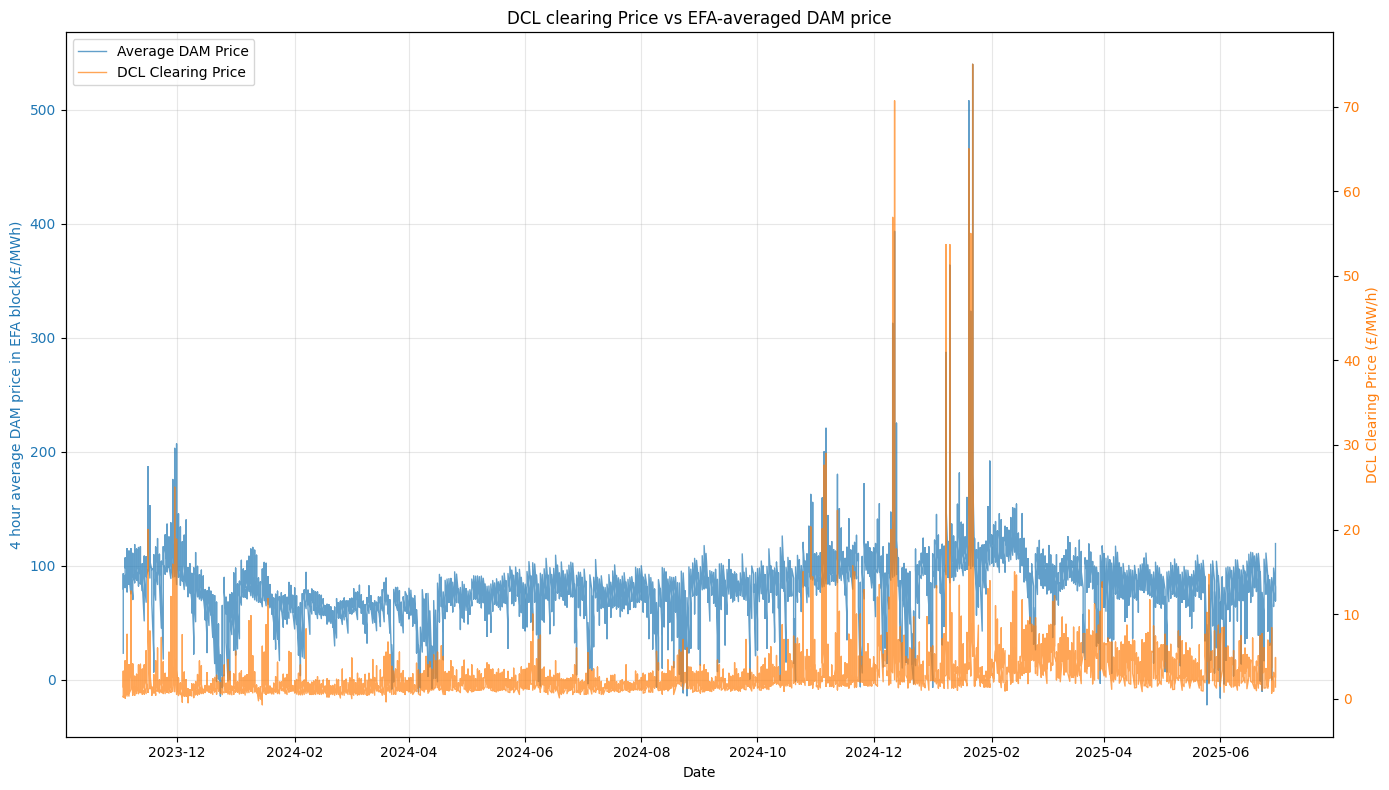

In [5]:
# Plot DCL price with EFA-averaed DAM price
import pandas as pd
import matplotlib.pyplot as plt

# Read the merged data
df = pd.read_csv('DAM_DCL_Merged_Prices.csv')
df['Delivery day'] = pd.to_datetime(df['Delivery day'])

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot DAM price on primary y-axis
color1 = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('4 hour average DAM price in EFA block(£/MWh)', color=color1)
ax1.plot(df['Delivery day'], df['Average DAM price in EFA block'], 
         color=color1, alpha=0.7, linewidth=1, label='Average DAM Price')
ax1.tick_params(axis='y', labelcolor=color1)

# Create secondary y-axis for DCL price
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('DCL Clearing Price (£/MW/h)', color=color2)
ax2.plot(df['Delivery day'], df['DCL_Clearing_Price'], 
         color=color2, alpha=0.7, linewidth=1, label='DCL Clearing Price')
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and grid
plt.title('DCL clearing Price vs EFA-averaged DAM price')
ax1.grid(True, alpha=0.3)

# Format x-axis dates
import matplotlib.dates as mdates
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

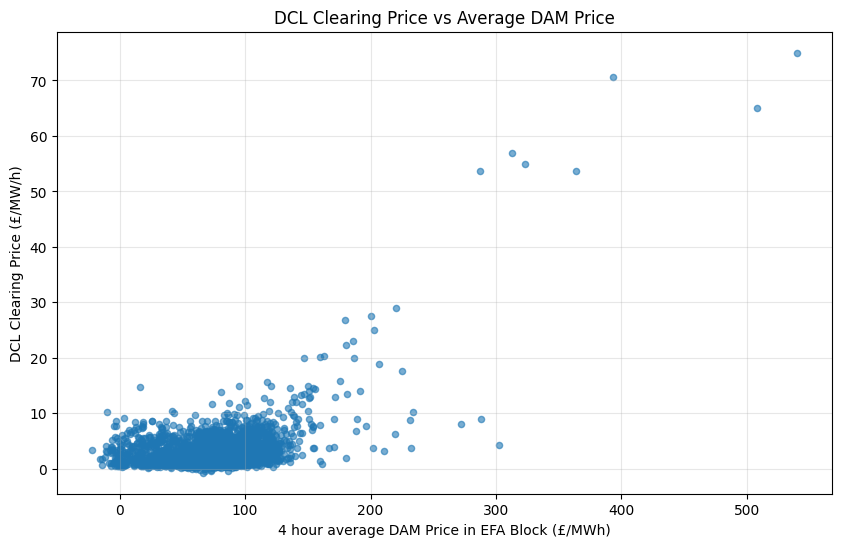

In [7]:
# Simple scatter plot of EFA-averaged DAM vs DCL prices
import pandas as pd
import matplotlib.pyplot as plt

# Read the merged data
df = pd.read_csv('DAM_DCL_Merged_Prices.csv')

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Average DAM price in EFA block'], df['DCL_Clearing_Price'], 
            alpha=0.6, s=20)
plt.xlabel('4 hour average DAM Price in EFA Block (£/MWh)')
plt.ylabel('DCL Clearing Price (£/MW/h)')
plt.title('DCL Clearing Price vs Average DAM Price')
plt.grid(True, alpha=0.3)
plt.show()